In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas import DataFrame

In [149]:
col_names = ['s1','s2', 's3', 's4','s5', 's6',  's7', 's8', 's9', 
           's10',  's11', 's12', 's13', 's14', 's15',  's16', 's17', 's18', 's19',  's20', 's21','ttf','label_bnc']
data_train = pd.read_csv('data/train.csv')
data_train[col_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   s1         20631 non-null  float64
 1   s2         20631 non-null  float64
 2   s3         20631 non-null  float64
 3   s4         20631 non-null  float64
 4   s5         20631 non-null  float64
 5   s6         20631 non-null  float64
 6   s7         20631 non-null  float64
 7   s8         20631 non-null  float64
 8   s9         20631 non-null  float64
 9   s10        20631 non-null  float64
 10  s11        20631 non-null  float64
 11  s12        20631 non-null  float64
 12  s13        20631 non-null  float64
 13  s14        20631 non-null  float64
 14  s15        20631 non-null  float64
 15  s16        20631 non-null  float64
 16  s17        20631 non-null  int64  
 17  s18        20631 non-null  int64  
 18  s19        20631 non-null  float64
 19  s20        20631 non-null  float64
 20  s21   

In [150]:
data_train[col_names].describe()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
count,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000
mean,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862,0.150259
std,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990,0.357334
min,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000,0.000000
25%,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000,0.000000
50%,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000,0.000000
75%,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000,0.000000
max,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000,1.000000


In [197]:
data_train['s4'].value_counts()

1409.01    20
1414.03    18
1404.47    18
1407.02    18
1407.15    18
           ..
1433.78     1
1430.82     1
1431.13     1
1392.26     1
1429.24     1
Name: s4, Length: 4051, dtype: int64

## xem dữ liệu có bị thiếu khuyết hay không

<AxesSubplot:>

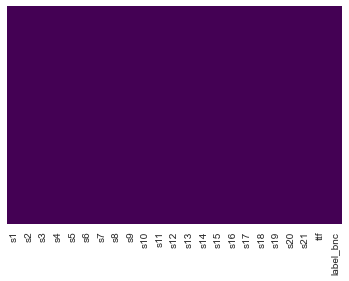

In [151]:
%matplotlib inline
sns.heatmap(data=data_train[col_names].isnull(), yticklabels=False, cbar =False, cmap = 'viridis')

## so sánh nhiều features với nhau và mối quan hệ giữa chúng

<AxesSubplot:>

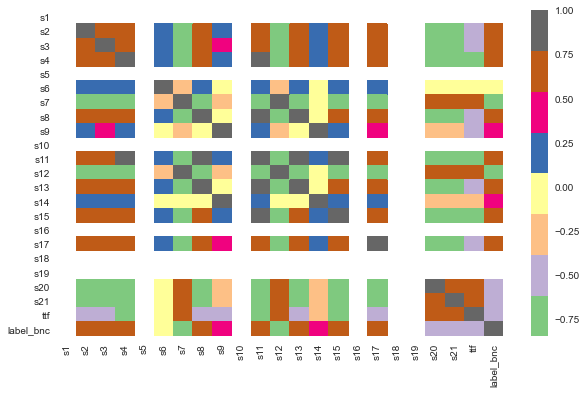

In [152]:
plt.figure(figsize=(10,6))
sns.heatmap(data_train[col_names].corr(),cmap= 'Accent')

## xem tương quan giữa các feature và đa cộng tuyến

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1= data_train[col_names].iloc[:,:-2]
vif_scores(df1)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Independent Features,VIF Scores
0,s1,0.000000e+00
1,s2,2.260884e+00
2,s3,2.282864e+00
3,s4,4.578003e+00
4,s5,1.659149e-25
5,s6,4.349514e-02
6,s7,4.237020e+00
7,s8,9.080392e-03
8,s9,1.648244e+01
9,s10,0.000000e+00


## loại bỏ feature ko tương quan

In [225]:
col_names1 = ['s2', 's3', 's4', 's7', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']

## biểu diễn sự mất cân bằng của dữ liệu

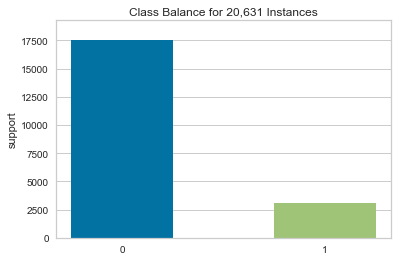

<AxesSubplot:title={'center':'Class Balance for 20,631 Instances'}, ylabel='support'>

In [226]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=['0','1'])
X1 = data_train[col_names1]
y1= data_train['label_bnc']
visualizer.fit(y1)        
visualizer.show() 

## biểu diễn giá trị ngoại lại

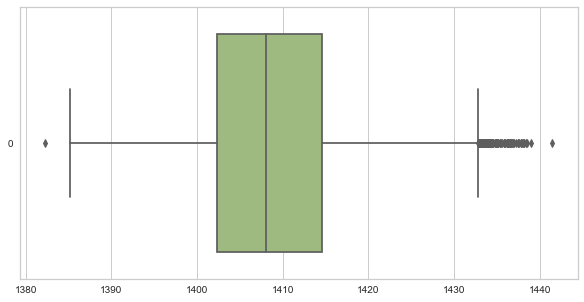

In [227]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s4'],orient="h",color = 'g') #from s1 to s21
plt.show()

## biểu diễn độ quan trọng của các feature

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


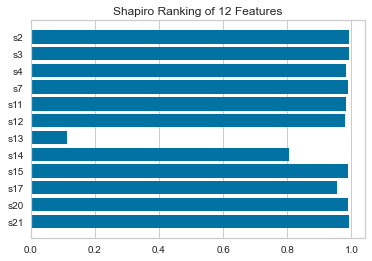

<AxesSubplot:title={'center':'Shapiro Ranking of 12 Features'}>

In [228]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features=col_names1, algorithm='shapiro')
visualizer.fit_transform(X=X.astype(float), y=data_train['ttf'])
visualizer.poof()

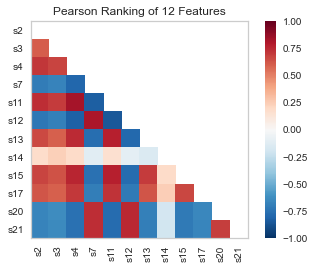

<AxesSubplot:title={'center':'Pearson Ranking of 12 Features'}>

In [229]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=col_names1, algorithm='pearson')
visualizer.fit_transform(X=X.astype(float), y=data_train['ttf'])
visualizer.poof() 

## Biểu diễn phân phối của dữ liệu

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='s21', ylabel='Density'>

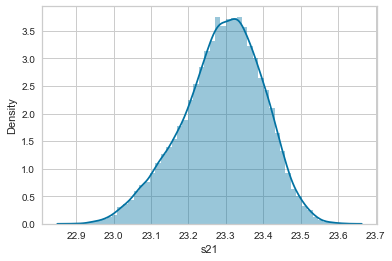

In [243]:

sns.distplot(a=data_train['s21'], kde=True)

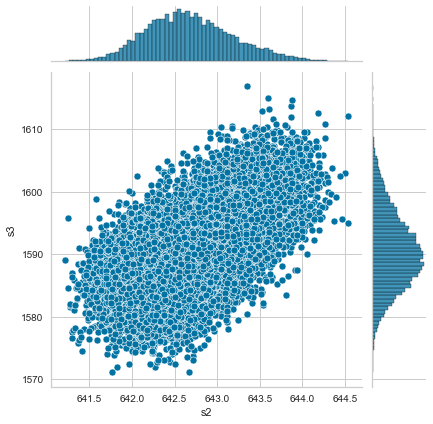

In [246]:
sns.jointplot(x='s2', y='s3', data=data_train[col_names1])

In [156]:
data_test = pd.read_csv('data/test.csv')
X_train = data_train[col_names1]
y_train =  data_train['ttf']
X_test = data_test[col_names1]
y_test = data_test['ttf']

regression = LinearRegression()
regression.fit(X_train, y_train)
# hệ số hồi quy
w1 = regression.coef_
w1


array([  -7.08623508,   -0.4596332 ,   -0.79636225,    7.09689047,
        -38.58435669,   10.95862007,  -13.49193377,   -0.63812921,
       -125.07937558,   -1.96193866,   20.74912844,   43.1220217 ])

In [157]:
# sai số
w0 =  regression.intercept_ 
w0


36142.750327205395

In [158]:
# giá trị dự đoán
y_pred = regression.predict(X_test)
y_pred

array([161.65451256, 121.51758119,  83.04466309,  96.48056154,
       114.58261333, 121.6313789 , 131.08481981,  95.87029293,
       114.51148866, 117.40683296,  98.90946703, 111.47288134,
        99.70624192, 114.79500736, 162.06372836, 137.04400232,
        81.52368755,  79.14452195, 122.38472551,  23.6640085 ,
       118.99599033, 143.38694699, 154.4773464 ,  33.6899708 ,
       137.06222127, 143.67465931, 129.58768515, 113.90708685,
       126.21729615,  99.44993644,  12.19215283, 108.12518069,
       108.0651611 ,   6.59709218,  -0.60986656,  34.81273722,
        81.51539197,  69.39779056, 154.6695948 ,  37.93732071,
        92.70554016,  36.91179697,  78.0359954 , 121.29685799,
        85.43464068,  67.38759629, 123.7073496 , 119.45573644,
        20.81957288, 127.99232267, 120.76360422,  50.63997706,
        41.57263569, 170.131978  , 140.8790971 ,  36.25243425,
       104.37003496,  72.69633097, 164.06834611, 117.60016632,
        52.64111105,  89.85904457,  84.71594426,  66.27

In [159]:
# R bình % của dự đoán
r_sq = regression.score(X_test, y_test)
r_sq 

0.41504559932988916

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


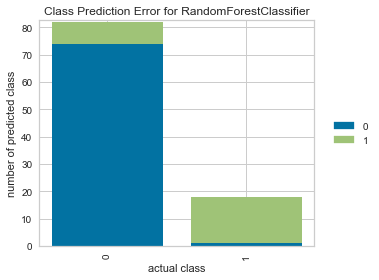

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [251]:
X_train1 = data_train[col_names1]
y_train1 =  data_train['label_bnc']
X_test1 = data_test[col_names1]
y_test1 = data_test['label_bnc']

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(model=RandomForestClassifier())
visualizer.fit(X=X_train1, y=y_train1)
visualizer.score(X=X_test1, y=y_test1)
visualizer.poof()

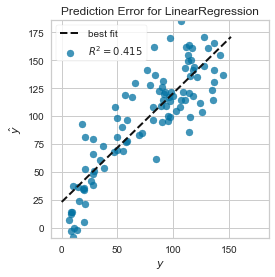

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [252]:
from yellowbrick.regressor import PredictionError
model = LinearRegression() # Instantiate the linear model and visualizer
visualizer = PredictionError(model=model, identity=False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()   

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


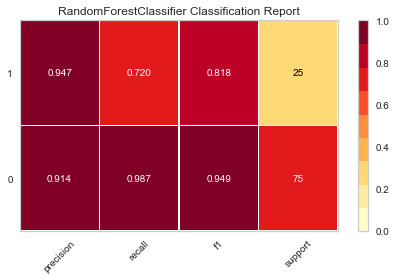

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [254]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model=RandomForestClassifier(), support=True)
visualizer.fit(X_train1, y_train1)  
visualizer.score(X_test1, y_test1)  
visualizer.poof()    